In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [119]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [120]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [122]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [123]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [124]:
y=df['Outcome']

In [125]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [127]:
X.shape

(768, 8)

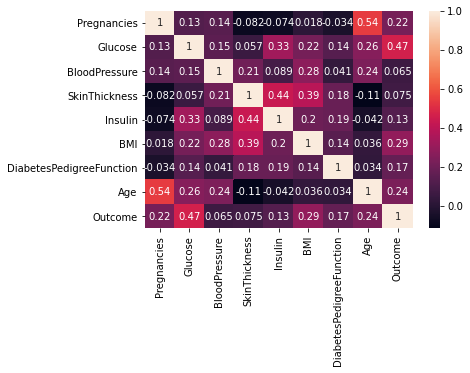

In [128]:
corr=df.corr()
sns.heatmap(corr,annot=True)

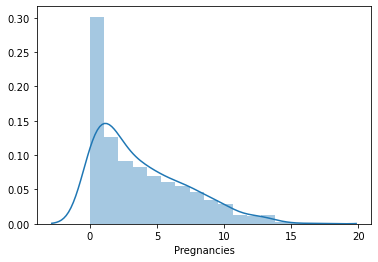

In [129]:
sns.distplot(X['Pregnancies'])

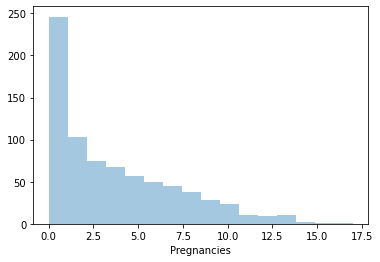

In [130]:
sns.distplot(X['Pregnancies'],kde=False)

In [131]:
X['Pregnancies'].max()

17

In [132]:
X['Pregnancies'].min()

0

In [133]:
X['Pregnancies'].mode()

0    1
dtype: int64

In [134]:
X['Pregnancies'].mean()

3.8450520833333335

In [135]:
a=df['Pregnancies']==17

In [136]:
b=df[a]
b.shape
b.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [137]:
c=df['Pregnancies']==df['Pregnancies'].min()
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0


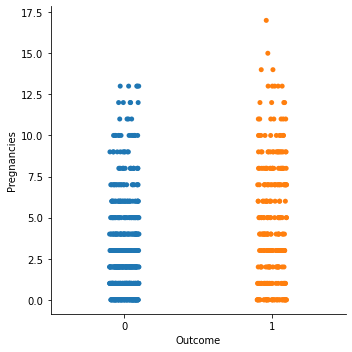

In [138]:
sns.catplot(x='Outcome',y='Pregnancies',data=df)

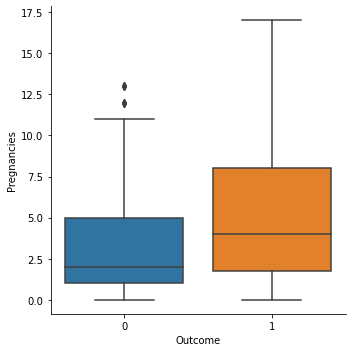

In [139]:
sns.catplot(x='Outcome',y='Pregnancies',kind='box',data=df)

In [140]:
c=df['Glucose']==df['Glucose'].min()
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [141]:
c=df['Glucose']==df['Glucose'].max()
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1


In [142]:
c=df['Glucose']==df['Glucose'].median()
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
29,5,117,92,0,0,34.1,0.337,38,0
128,1,117,88,24,145,34.5,0.403,40,1
229,0,117,80,31,53,45.2,0.089,24,0
336,0,117,0,0,0,33.8,0.932,44,0
442,4,117,64,27,120,33.2,0.230,24,0


In [143]:
df['Glucose'].mean()

120.89453125

In [144]:
c=df['Glucose']>df['Glucose'].mean()
d=df[c]
d.head(700)
d['Outcome'].mode()
d['Outcome'].value_counts()

1    195
0    154
Name: Outcome, dtype: int64

In [145]:
c=df['Glucose']<df['Glucose'].mean()
d=df[c]
d.head(700)
d['Outcome'].mode()
d['Outcome'].count()
d['Outcome'].value_counts()

0    346
1     73
Name: Outcome, dtype: int64

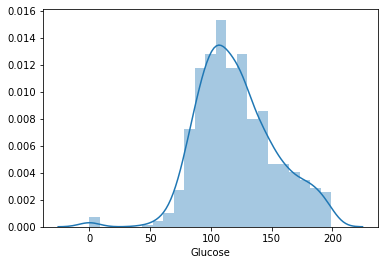

In [146]:
sns.distplot(X['Glucose'])

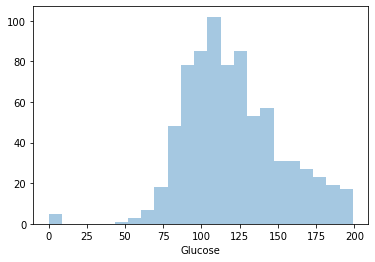

In [147]:
sns.distplot(X['Glucose'],kde=False)

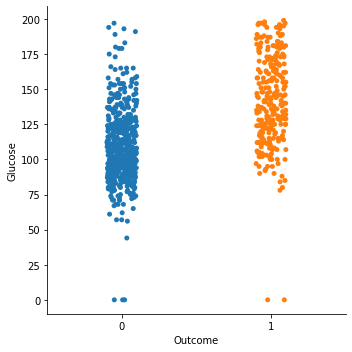

In [148]:
sns.catplot(x='Outcome',y='Glucose',data=df)

In [149]:
df['BloodPressure'].mean()

69.10546875

In [150]:
df['BloodPressure'].max()

122

In [151]:
df['BloodPressure'].min()

0

In [152]:
df['BloodPressure'].mode()

0    70
dtype: int64

In [153]:
df['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [154]:
c=df['BloodPressure']<df['BloodPressure'].mean()
d=df[c]
d.head(700)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
749,6,162,62,0,0,24.3,0.178,50,1
752,3,108,62,24,0,26.0,0.223,25,0
760,2,88,58,26,16,28.4,0.766,22,0
762,9,89,62,0,0,22.5,0.142,33,0


In [155]:
d['Outcome'].mode()
d['Outcome'].count()
d['Outcome'].value_counts()

0    232
1     86
Name: Outcome, dtype: int64

In [156]:
c=df['BloodPressure']>df['BloodPressure'].mean()
d=df[c]
d.head(700)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
5,5,116,74,0,0,25.6,0.201,30,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [157]:
d['Outcome'].mode()
d['Outcome'].count()
d['Outcome'].value_counts()

0    268
1    182
Name: Outcome, dtype: int64

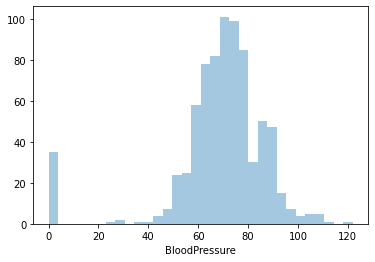

In [158]:
sns.distplot(X['BloodPressure'],kde=False)

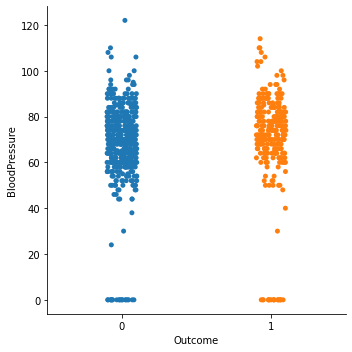

In [159]:
sns.catplot(x='Outcome',y='BloodPressure',data=df)

In [160]:
df['SkinThickness'].mean()

20.536458333333332

In [161]:
df['SkinThickness'].max()

99

In [162]:
df['SkinThickness'].min()

0

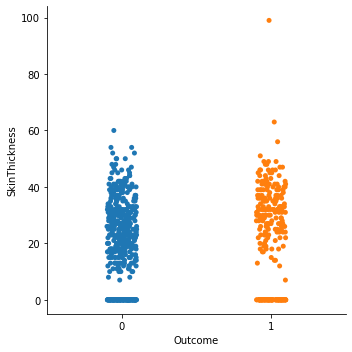

In [163]:
sns.catplot(x='Outcome',y='SkinThickness',data=df)

In [164]:
c=df['SkinThickness']<df['SkinThickness'].mean()
d=df[c]
d.head(700)
d['SkinThickness'].value_counts()

0     227
18     20
19     18
17     14
15     14
20     13
13     11
12      7
16      6
14      6
11      6
10      5
8       2
7       2
Name: SkinThickness, dtype: int64

In [165]:
d['Outcome'].mode()
d['Outcome'].count()
d['Outcome'].value_counts()


0    246
1    105
Name: Outcome, dtype: int64

In [166]:
105/(105+246)

0.29914529914529914

In [167]:
c=df['SkinThickness']>df['SkinThickness'].mean()
d=df[c]
d.head(700)
d['SkinThickness'].value_counts()
d['Outcome'].value_counts()


0    254
1    163
Name: Outcome, dtype: int64

In [168]:
163/(163+254)

0.3908872901678657

In [169]:
#We saw percentage of diabetic patient is more when skin thickness> than its mean value.

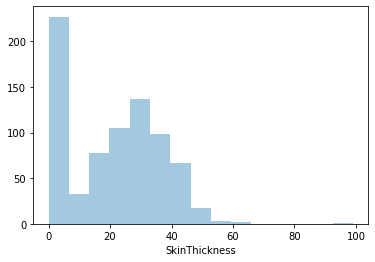

In [170]:
sns.distplot(X['SkinThickness'],kde=False)

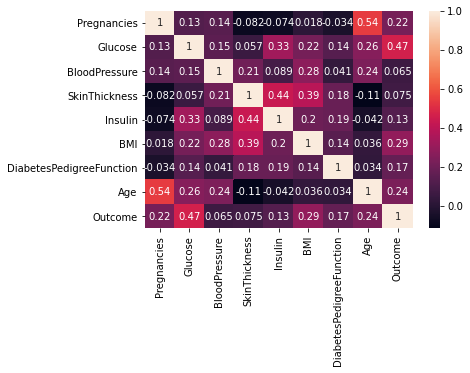

In [171]:
sns.heatmap(corr,annot=True)

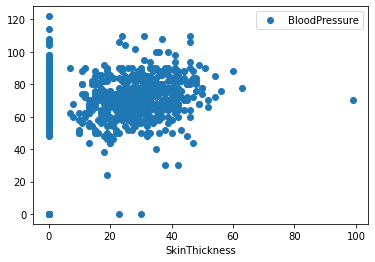

In [172]:
# correlation of skin thickness and blood pressure is comparatively more.
df.plot(x='SkinThickness',y='BloodPressure',style='o')

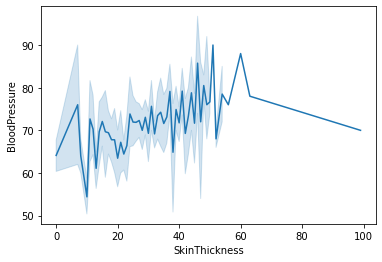

In [173]:
sns.lineplot(x=df['SkinThickness'],y=df['BloodPressure'])

In [174]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [175]:
c=df['Insulin']==846
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


In [176]:
c=df['Insulin']==0
d=df[c]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


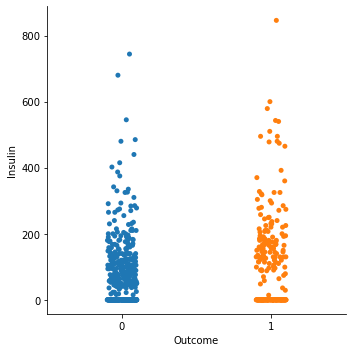

In [177]:
sns.catplot(x='Outcome',y='Insulin',data=df)

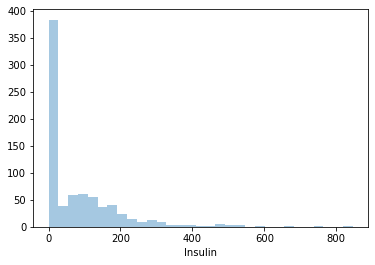

In [178]:
sns.distplot(X['Insulin'],kde=False)

In [179]:
c=df['Insulin']>df['Insulin'].mean()
d=df[c]
d.head(700)
d['Insulin'].value_counts()
d['Outcome'].value_counts()

0    168
1    121
Name: Outcome, dtype: int64

In [180]:
121/(121+168)

0.4186851211072664

In [181]:
c=df['Insulin']<df['Insulin'].mean()
d=df[c]
d.head(700)
d['Insulin'].value_counts()
d['Outcome'].value_counts()

0    332
1    147
Name: Outcome, dtype: int64

In [182]:
147/(147+332)

0.3068893528183716

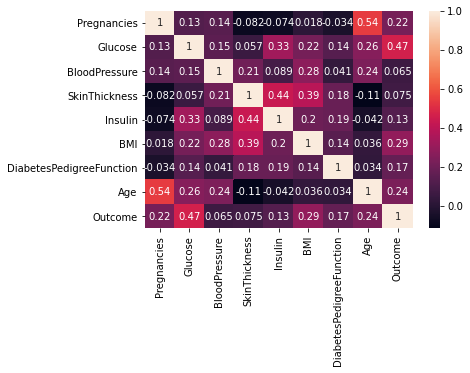

In [183]:
sns.heatmap(corr,annot=True)

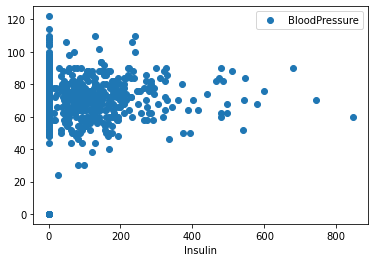

In [184]:
df.plot(x='Insulin',y='BloodPressure',style='o')

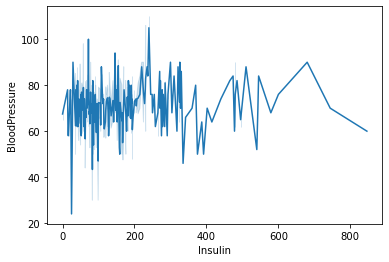

In [185]:
sns.lineplot(x=df['Insulin'],y=df['BloodPressure'])

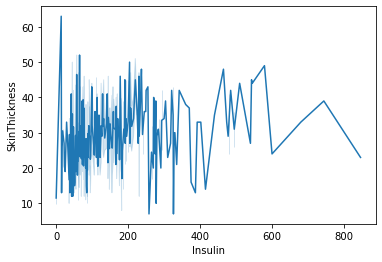

In [186]:
sns.lineplot(x=df['Insulin'],y=df['SkinThickness'])

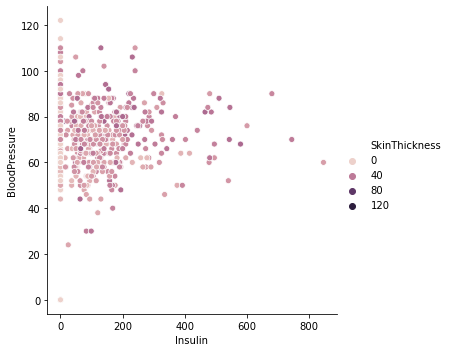

In [187]:
sns.relplot(x="Insulin", y="BloodPressure", hue="SkinThickness", data=df);


In [188]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [189]:
c=df['BMI']<df['BMI'].mean()
d=df[c]
d.head(700)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
760,2,88,58,26,16,28.4,0.766,22,0
762,9,89,62,0,0,22.5,0.142,33,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [190]:
d['Outcome'].value_counts()

0    289
1     84
Name: Outcome, dtype: int64

In [191]:
84/(84+289)

0.225201072386059

In [192]:
d['BMI'].value_counts()

31.2    12
31.6    12
0.0     11
30.1     9
30.8     9
        ..
30.7     1
26.3     1
22.7     1
30.3     1
30.2     1
Name: BMI, Length: 109, dtype: int64

In [193]:
c=df['BMI']>df['BMI'].mean()
d=df[c]
d.head(700)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0


In [194]:
d['Outcome'].value_counts()

0    211
1    184
Name: Outcome, dtype: int64

In [195]:
184/(184+211)

0.46582278481012657

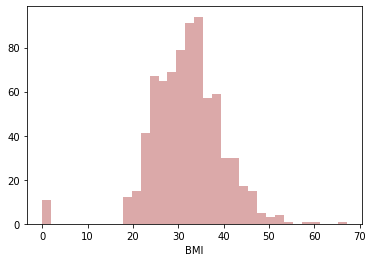

In [224]:
sns.distplot(X['BMI'],kde=False,color='brown')

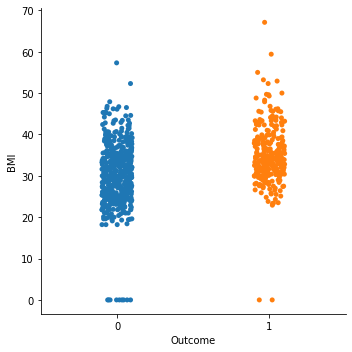

In [197]:
sns.catplot(x='Outcome',y='BMI',data=df)

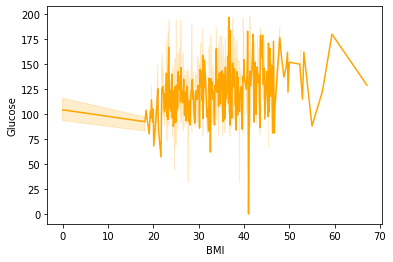

In [198]:
sns.lineplot(x=df['BMI'],y=df['Glucose'],color='orange')

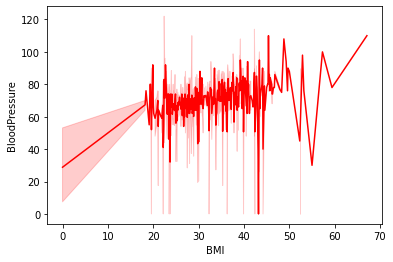

In [199]:
sns.lineplot(x=df['BMI'],y=df['BloodPressure'],color='red')

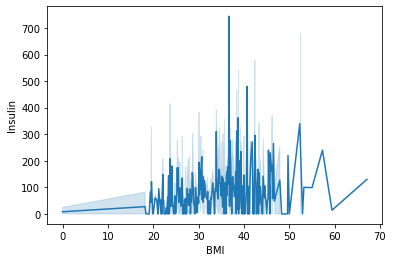

In [200]:
sns.lineplot(x=df['BMI'],y=df['Insulin'])

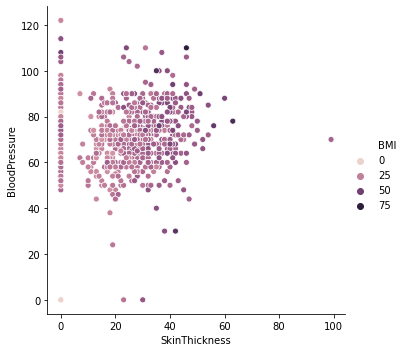

In [201]:
sns.relplot(x="SkinThickness", y="BloodPressure", hue="BMI", data=df);


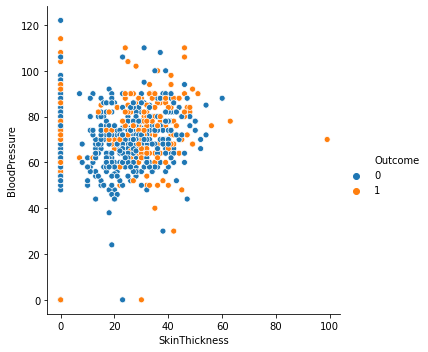

In [227]:
sns.relplot(x="SkinThickness", y="BloodPressure", hue="Outcome", data=df,color='purple');


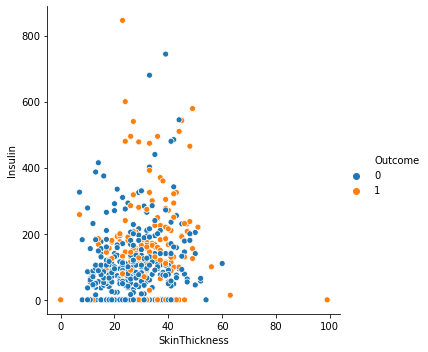

In [228]:
sns.relplot(x="SkinThickness", y="Insulin", hue="Outcome", data=df,color='purple');


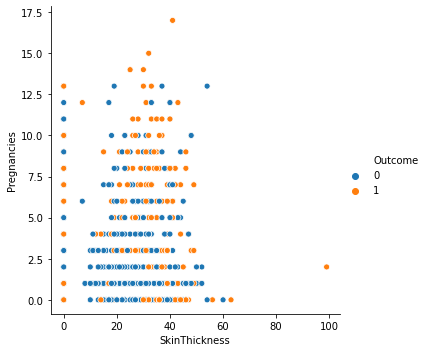

In [229]:
sns.relplot(x="SkinThickness", y="Pregnancies", hue="Outcome", data=df,color='purple');


In [202]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

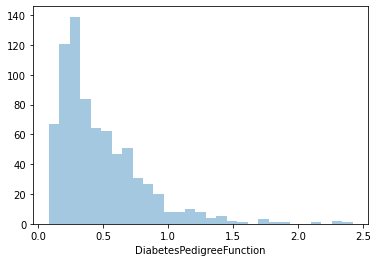

In [203]:
sns.distplot(X['DiabetesPedigreeFunction'],kde=False)

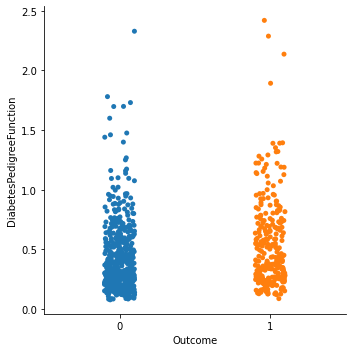

In [205]:
sns.catplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)

In [206]:
c=df['DiabetesPedigreeFunction']<df['DiabetesPedigreeFunction'].mean()
d=df[c]
d.head(700)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [207]:
d['Outcome'].value_counts()

0    334
1    139
Name: Outcome, dtype: int64

In [208]:
139/(139+334)

0.2938689217758985

In [212]:
c=df['DiabetesPedigreeFunction']>df['DiabetesPedigreeFunction'].mean()
d=df[c]
d.head(700)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0
747,1,81,74,41,57,46.3,1.096,32,0
750,4,136,70,0,0,31.2,1.182,22,1
755,1,128,88,39,110,36.5,1.057,37,1


In [213]:
d['Outcome'].value_counts()

0    166
1    129
Name: Outcome, dtype: int64

In [214]:
129/(129+166)

0.43728813559322033

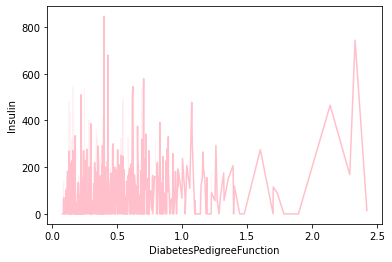

In [215]:
sns.lineplot(x=df['DiabetesPedigreeFunction'],y=df['Insulin'],color='pink')

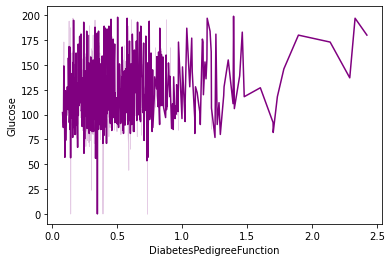

In [216]:
sns.lineplot(x=df['DiabetesPedigreeFunction'],y=df['Glucose'],color='purple')

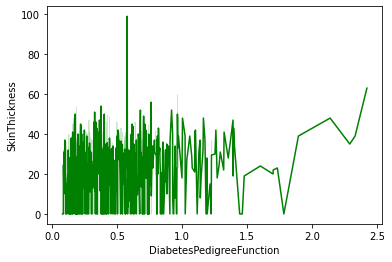

In [217]:
sns.lineplot(x=df['DiabetesPedigreeFunction'],y=df['SkinThickness'],color='green')

In [218]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

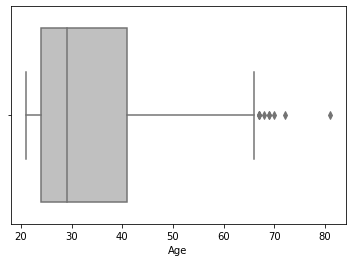

In [223]:
sns.boxplot(df['Age'],color='silver')

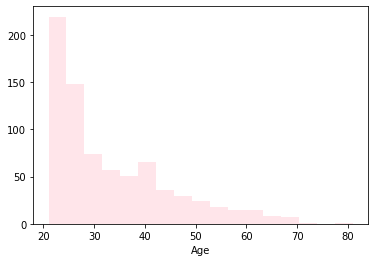

In [222]:
sns.distplot(df['Age'],kde=False,color='pink')

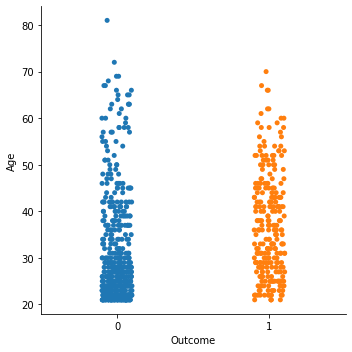

In [225]:
sns.catplot(x='Outcome',y='Age',data=df)

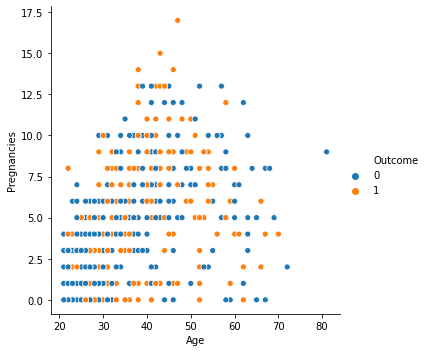

In [226]:
sns.relplot(x="Age", y="Pregnancies", hue="Outcome", data=df,color='purple');


In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [235]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [248]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=500,learning_rate=0.1,verbosity=1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

In [249]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.std()
accuracies.mean()


0.721390798519302

In [244]:
print(cm)

[[90 17]
 [11 36]]
